---
# **Sentiment Analysis**: Sentiment Analysis on GameSphere Game Reviews
---
## **Problem Statement**:


- GameSphere, a premier digital distribution platform for video games, stands at the forefront of the gaming industry by bridging a global community of gamers.
- It hosts a vast collection of games, encouraging users to leave reviews and share recommendations within the community.
- These reviews are crucial for feedback to developers and guide potential buyers in their decisions.
- Automatically analyzing and classifying the sentiment of these reviews as positive (recommended) or negative (not recommended) can offer invaluable insights into a game's acceptance and its overall standing among users.

## **Aim**:
- The main objective of this project is to build a smart model that can correctly figure out what a review is saying about a game on GameSphere.
- The model will look at the review text and other game info to decide if a review recommends the game. Moreover, the model will calculate **how likely a review is to be positive**.
- This detailed approach helps GameSphere better understand and organize game reviews from the internet, giving a clearer view of how popular and well-received games are.
- By doing this, we're not just seeing if people like a game but how much they like it, making our analysis more precise.


## **Dataset Attributes**:


- **review_id**: A unique identifier for each review, used to distinguish between different reviews.
- **title**: The name of the game that the review is about.
- **developer**: The name of the company or individual who developed the game.
- **publisher**: The name of the company that published the game, making it available to the public.
- **tags**: A list of categories or genres associated with the game, such as 'Free to Play', 'Strategy', 'Multiplayer', etc., which give a general idea of the game's nature.
- **overview**: A brief description or summary of the game, providing insight into its content or storyline.
- **year**: The year in which the game was released, indicating its age.
- **user_review**: The actual text of the user's review, where the reviewer shares their thoughts and opinions about the game.
- **sentiment**: Indicates the reviewer's overall sentiment towards the game, categorized as 'Positive' or 'Negative'.

- **PositiveSentimentProbability**: This is the target variable and it represents the probability that a game review expresses a positive sentiment towards the game. A probability closer to 0 indicates that the sentiment will be negative and a probability closer to 1 indicates a positive sentiment.

### **Hint**: **PositiveSentimentProbability** variable is not in the dataset. You simply have to predict the probability of the positive class (Using your best chosen model) and return that probability as your final submission.



---
# **Load dataset**
---

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import sklearn
from wordcloud import WordCloud
# Import other modules as per your convenience
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_validate

from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [2]:
# Load the dataset
df=pd.read_csv('data/train.csv')

---
# **Questions**
---
**Instructions:**
1.  Answer all questions.
2.  Justify your answers with appropriate reasoning, code, or calculations.
3.  Ensure your code is well-commented to explain your logic.
4.  Total Marks: 100

## **Question 1 : Data Analysis** (10 pt)
Summarize the data:
- How much data is present?
<font color='blue'> There are in total 17,319 records of data with 7 attributes: 'title', 'developer', 'publisher', 'tags', 'overview',
       'year', 'user_review'. The target variable is 'sentiment'</font>
- What attributes/features are continuous valued?
<font color='blue'> The feature column "year" is the only continous variable.</font>
- Which attributes are categorical?
<font color='blue'> Categorical attributes include 'title', 'developer', 'publisher', 'tags', 'overview',
       and 'user_review'.</font>
- Which attributes have a lot of text?
<font color='blue'>Three attributes contains a lot of text: 'tags', 'overview',
     and 'user_review'. The last two are mostly narratives and contains the most texts.</font>
- Explain noticeable traits for key attributes. Check distribution of the sentiment attribute.
<font color='blue'> For the sentiment attribute, there are more positive ratings (9868) than negative ratings(7451). It means we are more likely to sample positive ratings than negative ratings. Stratefied sampling or GridSearch will be ideal. </font>

- Are there any attributes that might require special treatment? If so, what special treatment might they require?
<font color='blue'> I would not use year as continual attribute, but categorical. Also the target variable should be converted to 0 and 1 for classification.
</font>
- Analyze and discuss the relationships between the data attributes, and between the data attributes and label.
<font color='blue'>Based on the years table, the number of reviews grew quickly since the inception of 2011. 
The majority of years, positive reviews outnumber negative reviews.   </font>
- Analyze the relationship between all the features. Use appropriate visualization techniques.
<font color='magenta'> A confusion matrix is created for this. </font>
- If there is a lot of textual information, how much count certain text-heavy attributes have.
<font color='blue'>Three attributes contains a lot of text: 'tags', 'overview',
     and 'user_review'. For the purpose of this study, only 'user_review'will be used for sentiment analysis.</font>
- Try using word-clouds to analyze text data.
<font color='blue'>See below</font>

In [3]:
#How much data is present? 
df.shape

(17319, 9)

In [4]:
df.columns

Index(['review_id', 'title', 'developer', 'publisher', 'tags', 'overview',
       'year', 'user_review', 'sentiment'],
      dtype='object')

In [5]:
# What attributes/features are continuous valued?
df.describe()
df.head(2)


,review_id,title,developer,publisher,tags,overview,year,user_review,sentiment
0,4848,SMITE®,Titan Forge Games,Hi-Rez Studios,"['Free to Play', 'MOBA', 'Multiplayer', 'Actio...",Enter the Battleground of the GodsJoin the mil...,2016.0,"I've played this game since before beta ended,...",Positive
1,15427,Business Tour - Board Game with Online Multipl...,Creobit,8Floor,"['Free to Play', 'Board Game', 'Strategy', 'Ma...","""Business Tour"" simple and entertaining gamepl...",2018.0,"fun little game , but you really need to put a...",Positive


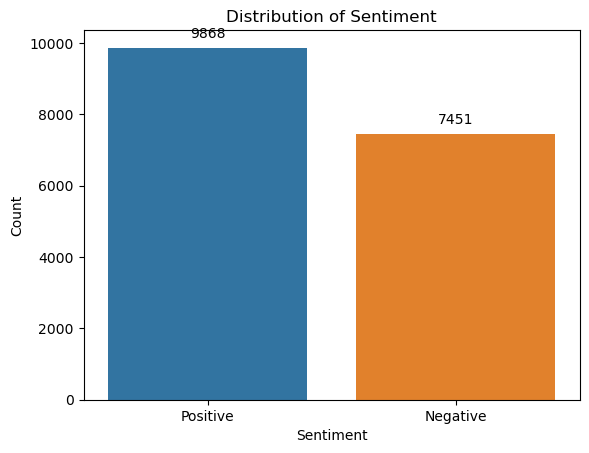

In [6]:
#distribution of the sentiment attribute.
import seaborn as sns

# Assuming 'sentiment' column contains categorical labels

ax = sns.countplot(x='sentiment', data=df)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiment')
plt.show()

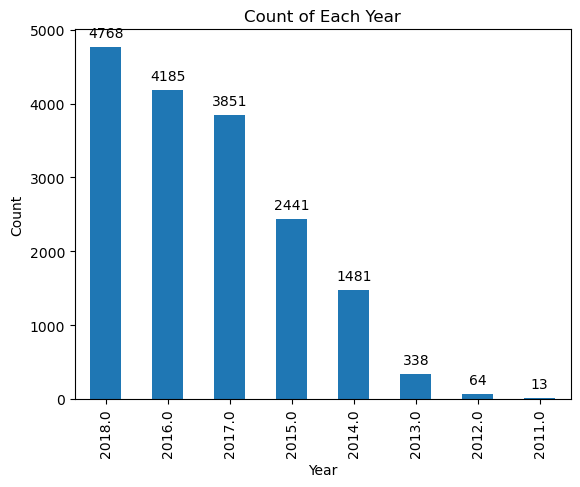

In [7]:
ax=df['year'].value_counts().plot(kind='bar')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Each Year')
plt.show()

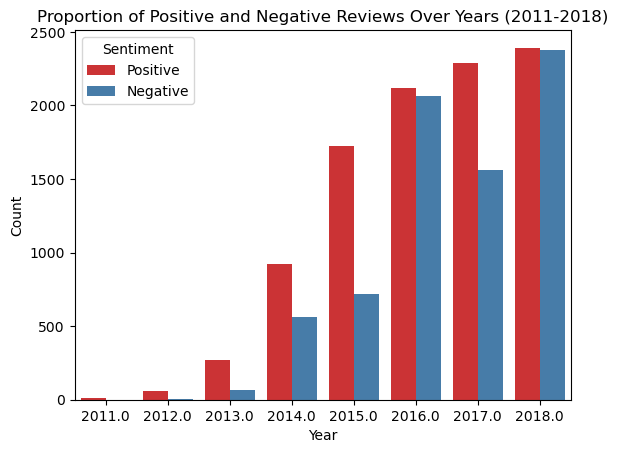

In [8]:
ax = sns.countplot(x=df['year'], hue=df['sentiment'], data=df, palette='Set1')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Proportion of Positive and Negative Reviews Over Years (2011-2018)')

# Show the legend
plt.legend(title='Sentiment')

In [9]:
#Analyze the relationship between all the features. Use appropriate visualization techniques.

In [10]:
#If there is a lot of textual information, how much count certain text-heavy attributes have.

df['user_review'].shape[0]



17319

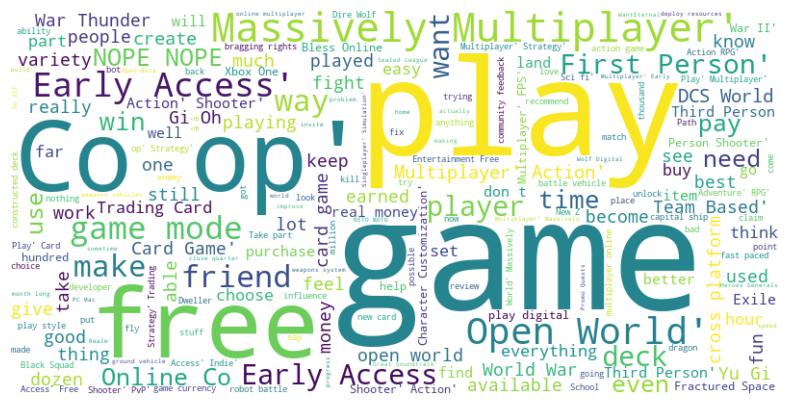

In [11]:
selected_columns = df.iloc[:, [1, 2, 3, 4, 5, 7]]  # All Categorical features without year

# Concatenate the text data from selected columns into a single string
text_data = ' '.join(selected_columns.values.flatten())

# Create the WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## **Question 2 : Data Pre-processing & Feature Engineering** (20 pt)
- Discuss the steps you would take to clean and prepare the data for modeling. Justify why each step is necessary.
<font color='blue'> 
<li><item>check null values in review and encode target variable to 0 and 1</item></li>
<li><item>Drop punctuation in overview and reviews using punctuation removal</item></li>
<li><item>Remove stop words  </item></li>
<li><item>Use regular expression to remove HTML tags and links, emojis (module 9.7)</item></li>

<li><item>Remove redundancy using lemmatization. Lemmatization is preferred, because stemming is a process that stems or removes last few characters from a word, often leading to incorrect meanings and spelling. Lemmatization considers the context and converts the word to its meaningful base form, which is called Lemma.</item></li>
<li><item>  Tokenization: separate text into individual elements (splitting with delimiter characters) and remove morphological affixes from words, leaving only the word stem (module 9.7). </item></li>
<li><item> Keep only adjectives (module 10.2). </item></li>

<li><item>Feature Engineer: Use **CounterVectorization** to convert words to feature vectors. (module 9.6)</item></li>
<li><item>Feature Engineer: Use **TF-IDF Vectorization** analyze text data to lower the weight of frequently occurring words in the Feature Vector. (module 9.6)</item>
</li> </font>


- Perform Feature Engineering on the dataset. Since this is a text-heavy dataset, you have to tokenize and pre-process the text data.

**Hints**:
- Check for any null values or duplicate rows in the dataset and perform necessary actions. Also, encoding categorical columns properly.
- Primary goal is to analyze reviews to predict sentiment. Such data requires a lot of pre-processing.
- You can start with using **regular expressions** to remove **links**, **HTML tags**, **unnecessary punctuation**, **emojis** (if any), etc.
- You can remove **stopwords** with very high or very low frequency across the reviews.
- You can also perform some advance techniques like **stemming** or **lemmatization** to further remove reduncancies.
- For feature engineering, you can use other techniques such as "**counter vectorization**" and "**tf-idf vectorization**" before modeling.

#### <font color='red'>Data Preprocessing</font>

In [12]:
df=pd.read_csv('data/train.csv')
df=df[['user_review','sentiment']]

##### 1. Drop Null Values

In [13]:
#Drop null values
df['user_review'].isnull().sum()

0

In [14]:
#encode target to 0 and 1
df['sentiment']=df['sentiment'].apply(lambda x: 1 if x == 'Positive' else 0)

##### 2.  Remove Punctuation for `df['user_review']`

In [15]:
#remove punctuation (Module 10.2):
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuation with no space, which in effect deletes the punctuation marks
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)
#We only use user_review to make prediction on sentiment. 
df['user_review'] = df['user_review'].apply(remove_punctuation)
df.head(1)

,user_review,sentiment
0,Ive played this game since before beta ended i...,1


##### 3. Remove Stop words for `df['user_review']`

In [16]:
#remove stop words (Module 10.2)
from nltk.corpus import stopwords
stop = stopwords.words('english')

def removestopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in stop]
    # joining the list of words with space separator
    return " ".join(text)
df['user_review'] = df['user_review'].apply(removestopwords)
df.head(2)

,user_review,sentiment
0,ive played game since beta ended im pretty add...,1
1,fun little game really need put vote kick opti...,1


##### 4. Remove HTML tags, emojis, links in `df['user_review']`

In [17]:
#Use Re to remove HTML tags, emojis, and links (Module 9.7)
import re
import emoji


def preprocessor(text):
    # Remove HTML tags
    text = re.sub('<[^>]*>', '', text)
    
    # Remove links
    text = re.sub(r'http\S+', '', text)
    
    # Extract emoticons
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    
    # Lowercase and remove non-word characters, then add extracted emoticons
    text = re.sub('[\W]+', ' ', text.lower()) + ' '.join(emoticons).replace('-', '')
    
    return text


df['user_review'] = df['user_review'].apply(preprocessor)
df.head(2)

,user_review,sentiment
0,ive played game since beta ended im pretty add...,1
1,fun little game really need put vote kick opti...,1


##### 5. Lemmatization for `df['user_review']`

In [18]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

def lemmatizewords(text):
    #WordNet Lemmatization
    text = [WordNetLemmatizer().lemmatize(word) for word in text.split()]
    return " ".join(text)


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/haijingtu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/haijingtu/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [19]:
df['user_review'] = df['user_review'].apply(lemmatizewords)
df.head(2)

,user_review,sentiment
0,ive played game since beta ended im pretty add...,1
1,fun little game really need put vote kick opti...,1


#####  6. Tokenization  of`df['user_review']`
separate text into individual elements (splitting with delimiter characters) and remove morphological affixes from words, leaving only the word stem 

In [20]:
#from nltk.stem import word_tokenize
from nltk.tokenize import word_tokenize
nltk.download('punkt')

def tokenizeword(text):
    text = word_tokenize(text)
    return text


[nltk_data] Downloading package punkt to /Users/haijingtu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [21]:
df['tokenized'] = df['user_review'].apply(tokenizeword)
df.head(2)

,user_review,sentiment,tokenized
0,ive played game since beta ended im pretty add...,1,"[ive, played, game, since, beta, ended, im, pr..."
1,fun little game really need put vote kick opti...,1,"[fun, little, game, really, need, put, vote, k..."


##### 7. Keep Only Adjectives in  `df['tokenized']`

In [22]:
nltk.download('averaged_perceptron_tagger')

# j is adject, r is adverb, and v is verb
# allowed_word_types = ["J","R","V"]
allowed_word_types = ["J"]

def pos(text):
    # parts of speech tagging for each word 
    pos = nltk.pos_tag(text)

    adjective = []

    # make a list of  all adjectives identified by the allowed word types list above
    for w in pos:
        if w[1][0] in allowed_word_types:
            adjective.append(w[0])

    return adjective

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/haijingtu/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [23]:
df['tokenized'] = df['tokenized'].apply(pos)

df.head(2)

,user_review,sentiment,tokenized
0,ive played game since beta ended im pretty add...,1,"[ive, addictedprosthe, first, pretty, cool, ne..."
1,fun little game really need put vote kick opti...,1,"[little, put, xd, afk]"


##### 8. Frequency Tables

In [24]:
all_words =[]
for x in df['tokenized']:
    all_words.extend(x)

print(len(all_words))

# creating a frequency distribution of each word.
freqdist = nltk.FreqDist(all_words)
# listing the 5000 most frequent words
frequent_features = list(freqdist.keys())[:5000]

print(len(frequent_features))

257690
5000


<AxesSubplot:>

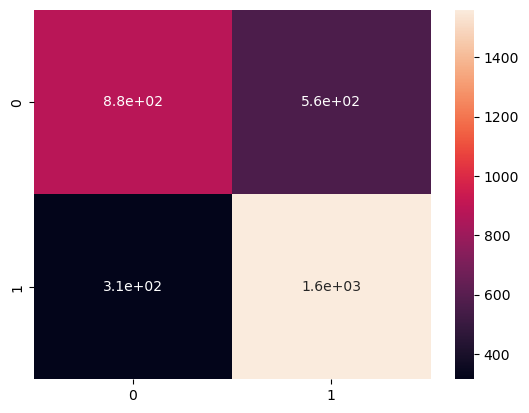

In [25]:
#create features in each review:
def find_features(tokenized_review):
    features = {}
    for w in frequent_features:
        features[w] = (w in tokenized_review)
    return features

# Creating features for each review
# This can take a while...
featuresets = [(find_features(review), sentiment) for (review, sentiment) in zip(df['tokenized'], df['sentiment'])]

from nltk.classify.naivebayes import NaiveBayesClassifier
import random
# Shuffling the documents 
random.shuffle(featuresets)

trainng_set = featuresets[:14000]
testing_set = featuresets[14000:]

#train classifier and create confusion matrix for correlation:
# This can take a while...
classifier = NaiveBayesClassifier.train(trainng_set)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

ground_truth = [test_case[1] for test_case in testing_set]
predictions = [classifier.classify(test_case[0]) for test_case in testing_set]

#visualize confusion matrix
cf_matrix=confusion_matrix(ground_truth, predictions)
sns.heatmap(cf_matrix, annot=True)

<AxesSubplot:>

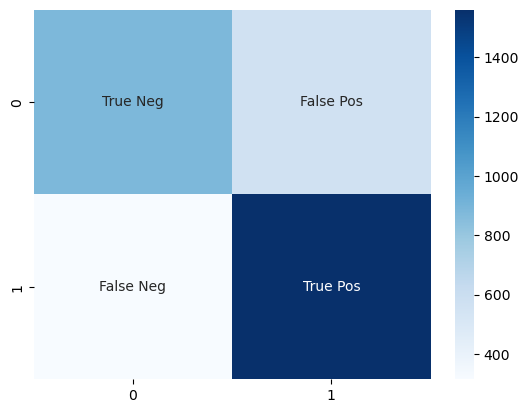

In [44]:

labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

#### <font color='red'>Feature Engineering</font>

##### 1. Count Vectorization

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

# Flatten the list of lists into a single list of strings
docs = [review for sublist in df['tokenized'] for review in sublist]

# Create CountVectorizer object
count = CountVectorizer()

# Transform the text data into a bag-of-words representation
bag_of_words = count.fit_transform(docs)


print("vocab index: {}", count.vocabulary_)
print("shape of sparse matrix: {}".format(bag_of_words.shape))
print("sparse matrix:\n {}".format(bag_of_words.toarray()))
print("bag_of_words: ", bag_of_words)

vocab index: {} {'ive': 10588, 'addictedprosthe': 279, 'first': 6788, 'pretty': 15588, 'cool': 3657, 'new': 13171, 'little': 11382, 'various': 22484, 'unlockable': 21711, 'good': 8322, 'occasional': 13799, 'lower': 11669, 'full': 7508, 'double': 4980, 'current': 4008, 'complicatedtldr': 3445, 'fair': 6393, 'enjoyable': 5669, 'willing': 23181, 'put': 15928, 'xd': 23509, 'afk': 421, 'zen': 23698, 'real': 16216, 'astral': 1379, 'opposite': 14149, 'daily': 4078, 'quest': 15996, 'several': 17753, 'quicken': 16027, 'extra': 6267, 'rare': 16169, 'powerful': 15463, 'starter': 18978, 'guardian': 8662, 'exclusive': 6079, 'gear': 8061, 'content': 3589, 'youre': 23655, 'user': 22345, 'free': 7229, 'patient': 14703, 'unwanted': 21983, 'fest': 6641, 'certain': 2860, 'leveledvalued': 11200, 'worth': 23399, 'mmo': 12479, 'special': 18715, 'funny': 7605, 'tactical': 19731, 'great': 8507, 'understand': 21405, 'past': 14675, 'expensive': 6167, 'many': 11927, 'love': 11648, 'optimise': 14165, 'psyhic': 15

##### 2. TF-IDF Vectorization

In [27]:
from sklearn.feature_extraction.text import TfidfTransformer

np.set_printoptions(precision=2)
tfidf = TfidfTransformer(use_idf=True, smooth_idf=True) 
print(tfidf.fit_transform(bag_of_words).toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [28]:
# create the object of tfidf vectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(input="english")
# fit the vectorizer using the text data
tfidf_vectorizer.fit(df['user_review'])
# collect the vocabulary items used in the vectorizer
dictionary = tfidf_vectorizer.vocabulary_.items()

# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count, 
# append the values to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panads dataframe with vocab as index
vocab_bef_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)

top_vocab = vocab_bef_stem.head(1000)
#top_vocab.plot(kind = 'barh', figsize = (5,10), xlim = (25230, 25260))
top_vocab 

ﾌﾌ                     81401
ﾉಥдಥﾉ                  81400
황무지                    81399
황망한                    81398
혼자서                    81397
                       ...  
свидáния               80406
свершилосьреволюция    80405
сацsеs                 80404
сацsе                  80403
самый                  80402
Length: 1000, dtype: int64

## **Question 3 : Modeling** (20 pt)

- You are supposed to train a **Logistic Regression Classifier** along with atleast two other classifiers of your choice and optimize their hyperparameters (Hint: Using GridsearchCV) to enhance performance.
- Implement a validation pipeline utilizing 5-fold cross-validation.
- For each classifier, report **F1 score**, **Precision**, **Recall**, **Accuracy**, **ROC-AUC**, and **Cross-validation** score).
- Also, for each model, **plot the ROC-AUC curve**.
- Describe and discuss your findings.

**Hint**:
- To calculate the ROC-AUC scores, you need to predict the probabilites of the classes instead of the classes themselves. You can refer to the sklearn documentation for [sklearn.metrics.roc_auc_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) for more information.

In [31]:
#Identify X train and Y train
x = df['tokenized'].apply(lambda tokens: ' '.join(tokens))
y=df['sentiment']
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size=0.3, random_state=0)

##### <font color='red'>1. Logistic Regression</font>

In [36]:

%%time 

params = {'dtm__ngram_range':[(1,1), (1,2), (1,3), (2,2), (2,3), (2,4)],
          'dtm__max_df':[.3, .4, .5, .6],
          'dtm__min_df':list(range(0,10,2)),
          'clf__penalty': ['l1', 'l2'],
          'clf__C': [1.0, 10.0, 100.0]
         }

pipe = Pipeline([('dtm', CountVectorizer()),
                ('clf', LogisticRegression())
                ])

gs_lr = GridSearchCV(pipe, params, cv=5, verbose=1, n_jobs=-1)
gs_lr.fit(X_train, y_train)


Fitting 5 folds for each of 720 candidates, totalling 3600 fits


/Users/haijingtu/opt/anaconda3/envs/env002/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/haijingtu/opt/anaconda3/envs/env002/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

CPU times: user 22 s, sys: 7.58 s, total: 29.6 s
Wall time: 5min 49s


/Users/haijingtu/opt/anaconda3/envs/env002/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('dtm', CountVectorizer()),
                                       ('clf', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'clf__C': [1.0, 10.0, 100.0],
                         'clf__penalty': ['l1', 'l2'],
                         'dtm__max_df': [0.3, 0.4, 0.5, 0.6],
                         'dtm__min_df': [0, 2, 4, 6, 8],
                         'dtm__ngram_range': [(1, 1), (1, 2), (1, 3), (2, 2),
                                              (2, 3), (2, 4)]},
             verbose=1)

In [37]:
print('Logistic Regression Best parameter set: %s ' % gs_lr.best_params_)
print()
print('Logistic Regression CV Accuracy: %.3f' % gs_lr.best_score_)
print()
clf = gs_lr.best_estimator_
print('Logistic Regression Test Accuracy: %.3f' % clf.score(X_test, y_test))
print()
y_pred = gs_lr.predict(X_test)
gs_lr_tfidf_report = classification_report(y_test, y_pred)
print("Classifiction report for Logistic regression pipeline")
print(gs_lr_tfidf_report)

Logistic Regression Best parameter set: {'clf__C': 1.0, 'clf__penalty': 'l2', 'dtm__max_df': 0.4, 'dtm__min_df': 0, 'dtm__ngram_range': (1, 2)} 

Logistic Regression CV Accuracy: 0.754

Logistic Regression Test Accuracy: 0.752

Classifiction report for Logistic regression pipeline
              precision    recall  f1-score   support

           0       0.73      0.65      0.69      2186
           1       0.77      0.82      0.79      3010

    accuracy                           0.75      5196
   macro avg       0.75      0.74      0.74      5196
weighted avg       0.75      0.75      0.75      5196



Logistic Regression Pipeline AUC:0.826



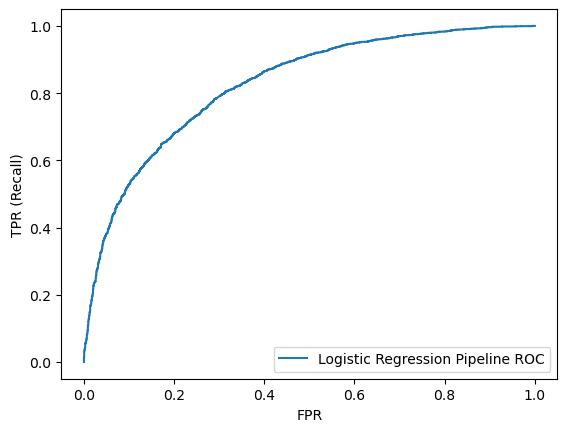

In [38]:
#Plot ROC

y_probs = gs_lr.predict_proba(X_test)
auc=roc_auc_score(y_test,y_probs[:, 1])
print("Logistic Regression Pipeline AUC:{:.3f}".format(auc))
print()
# Binarize the true labels which have 5 classes
#y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Compute ROC curve and ROC area for each class
fpr, tpr, thresholds=roc_curve(y_test,y_probs[:,1])

plt.plot(fpr, tpr, label="Logistic Regression Pipeline ROC")
plt.xlabel("FPR")
plt.ylabel("TPR (Recall)")
plt.legend(loc=4)# use this ROC 

##### <font color='red'>2. MultinomialNB</font>

In [35]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [32]:
%%time 

params = {'dtm__ngram_range':[(1,1), (1,2), (1,3), (2,2), (2,3), (2,4)],
          'dtm__max_df':[.3, .4, .5, .6],
          'dtm__min_df':list(range(0,10,2)),
         }

pipe = Pipeline([('dtm', CountVectorizer()),
                ('mnb', MultinomialNB())
                ])

gs = GridSearchCV(pipe, params, cv=5, verbose=1, n_jobs=-1)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
CPU times: user 4.08 s, sys: 993 ms, total: 5.07 s
Wall time: 39.7 s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('dtm', CountVectorizer()),
                                       ('mnb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'dtm__max_df': [0.3, 0.4, 0.5, 0.6],
                         'dtm__min_df': [0, 2, 4, 6, 8],
                         'dtm__ngram_range': [(1, 1), (1, 2), (1, 3), (2, 2),
                                              (2, 3), (2, 4)]},
             verbose=1)

In [33]:
print('NB Best parameter set: %s ' % gs.best_params_)
print()
print('NB CV Accuracy: %.3f' % gs.best_score_)
print()
clf = gs.best_estimator_
print('NB Test Accuracy: %.3f' % clf.score(X_test, y_test))
print()
y_pred = gs.predict(X_test)
gs_NB_report = classification_report(y_test, y_pred)
print("Classifiction report for Logistic regression pipeline")
print(gs_NB_report)

NB Best parameter set: {'dtm__max_df': 0.3, 'dtm__min_df': 4, 'dtm__ngram_range': (1, 1)} 

NB CV Accuracy: 0.757

NB Test Accuracy: 0.752

Classifiction report for Logistic regression pipeline
              precision    recall  f1-score   support

           0       0.73      0.65      0.69      2186
           1       0.77      0.82      0.79      3010

    accuracy                           0.75      5196
   macro avg       0.75      0.74      0.74      5196
weighted avg       0.75      0.75      0.75      5196



NB Pipeline AUC:0.829



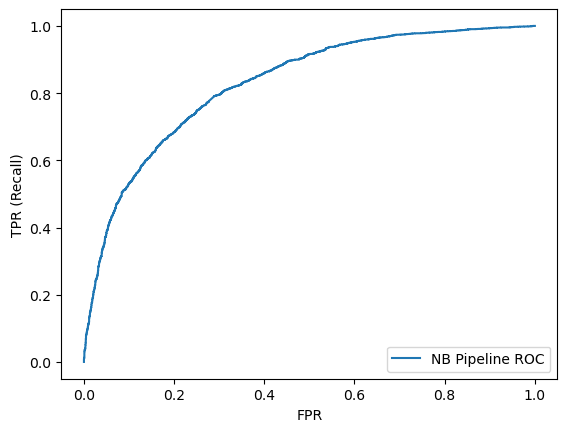

In [34]:
#Plot ROC
from sklearn.preprocessing import label_binarize
import numpy as np
from sklearn.metrics import roc_curve, auc


y_probs = gs.predict_proba(X_test)
auc=roc_auc_score(y_test,y_probs[:, 1])
print("NB Pipeline AUC:{:.3f}".format(auc))
print()# Plot ROC curve and ROC area for each class
fpr, tpr, thresholds=roc_curve(y_test,y_probs[:,1])

plt.plot(fpr, tpr, label="NB Pipeline ROC")
plt.xlabel("FPR")
plt.ylabel("TPR (Recall)")
plt.legend(loc=4)# use this ROC 

##### <font color='red'> 3. KNN

In [44]:
%%time
# Define parameter grid
params = {#'dtm__ngram_range':[(1,1), (1,2), (1,3), (2,2), (2,3), (2,4)],
          #'dtm__max_df':[.3, .4, .5, .6],
          #'dtm__min_df':list(range(0,10,2)),
          'clf__n_neighbors':[3,5,8],
          'clf__p':[1,2],
          'clf__weights':['uniform','distance'],
    # Include hyperparameters for classifiers in the grid
}



KNN_pipe = Pipeline([('vect', CountVectorizer()), 
                   ('clf', KNeighborsClassifier())])

gs_KNN = GridSearchCV(KNN_pipe, params, scoring='accuracy', cv=5, n_jobs=-2, verbose=1)
gs_KNN.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
CPU times: user 483 ms, sys: 289 ms, total: 772 ms
Wall time: 18.6 s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                       ('clf', KNeighborsClassifier())]),
             n_jobs=-2,
             param_grid={'clf__n_neighbors': [3, 5, 8], 'clf__p': [1, 2],
                         'clf__weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

Best parameter set for KNN: {'clf__n_neighbors': 8, 'clf__p': 2, 'clf__weights': 'distance'} 
KNN CV Accuracy: 0.603

KNN Test Accuracy: 0.619
Classifiction report for KNN pipeline
              precision    recall  f1-score   support

           0       0.56      0.43      0.49      2186
           1       0.65      0.76      0.70      3010

    accuracy                           0.62      5196
   macro avg       0.60      0.59      0.59      5196
weighted avg       0.61      0.62      0.61      5196

gs_KNN_tfidf AUC:0.641



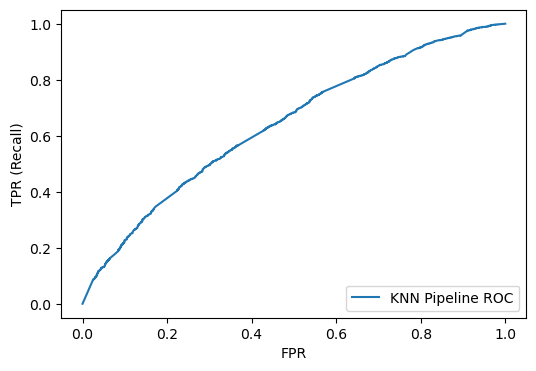

In [45]:
#Best Estimator 
print('Best parameter set for KNN: %s ' % gs_KNN.best_params_)
print('KNN CV Accuracy: %.3f' % gs_KNN.best_score_)
print()
clf = gs_KNN.best_estimator_
print('KNN Test Accuracy: %.3f' % clf.score(X_test, y_test))

#predict X_test
y_pred = gs_KNN.predict(X_test)
gs_GS_tfidf_report = classification_report(y_test, y_pred)
print("Classifiction report for KNN pipeline")
print(gs_GS_tfidf_report)

#Plot ROC
y_probs = gs_KNN.predict_proba(X_test)
auc=roc_auc_score(y_test,y_probs[:, 1])
print("gs_KNN_tfidf AUC:{:.3f}".format(auc))
print()


# Compute ROC curve and ROC area for each class
fpr, tpr, thresholds=roc_curve(y_test,y_probs[:,1])
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label="KNN Pipeline ROC")
plt.xlabel("FPR")
plt.ylabel("TPR (Recall)")
plt.legend(loc=4)# use this ROC 

## **Question 4 : Evaluation and Reporting** (20 pt)

- Select a model that is expected to perform optimally on the unseen data and provide the predicted sentiments accordingly.
- Give clear conclusions.

<font color='blue'> The best model is tied between Multinomial NB and logistic regression with the highest accuracy score as shown in the classfication report. However, Multinomial pipeline does have a ROC_AUC score of 0.829, compared with Logistic regression's 0.826.  Even though it's only .003 in difference, I decide to go with Naive Bayes.</font>


In [47]:
best_model = gs.best_estimator_

# Fit the best model on the entire training dataset (including validation data if applicable)
best_model.fit(X_train, y_train)

# Make predictions on the test data

y_test_pred = best_model.predict(X_test)
evaluation_score = model_evaluation(y_test, y_test_pred)
#Evaluate the model


The ROC_AUC score is :  0.7382301447143252


## **Question 5 : External validation** (30 pt)

- A dataset named '`test.csv`' is provided to you in which the sentiment label is hidden.
- You have to choose the best model (the classifier which has the highest ROC-AUC score) and then use that model to predict the probabilities of sentiment on the '`test.csv`'.
- After prediction, you will get a 2D array of probabilities for each sentiment. Select the 2nd column of probabilites for your submission.

```
# Fit
your_best_model = model.fit(x_train)

# Calculate the probabilities of both classes and extract the probabilities of positive class
pred_probabilities = your_best_model.predict_proba(x_test)[:,1]

# Evaluate/Submit
---
```

- Convert that final array into a csv file, name it as '`submission.csv`' and submit that '`submission.csv`' file.

In [48]:
# This is pseudo-code. Each student have to use their actual code for this.

# step 1. Load the  data
test = pd.read_csv('data/test.csv')



In [49]:
# step 2. Pre-process the test data. You can use the same pre processing methods which you used for the train dataset earlier
#x_test = preprocess_data(test)
#1. drop null values
test=test.dropna().copy()
#2. remove punctuation
test['user_review'] = test['user_review'].apply(remove_punctuation)
#3. remove stop words
test['user_review'] = test['user_review'].apply(removestopwords)
#4. remove hyperlinks emojis html
test['user_review'] = test['user_review'].apply(preprocessor)
#5. Lemmetizataion
test['user_review'] = test['user_review'].apply(lemmatizewords)
#6. tokenization
test['tokenized'] = test['user_review'].apply(tokenizeword)
#7. Keep only adjectives
test['tokenized'] = test['tokenized'].apply(pos)


In [50]:
X_test = test['tokenized']
len(X_test)

175

In [51]:
X_test

0      [free, many, fine, nice, feature, new, dont, k...
1      [understatement, favorite, new, alive, repetit...
2      [good, new, easy, learn, old, deek, low, low, ...
3      [phenomenal, strong, stingy, card, high, wide,...
4      [objective, enemy, diethere, several, op, high...
                             ...                        
170                  [spectacular, come, complex, great]
171           [great, wonderful, awesome, great, little]
172    [huge, bigger, honest, long, ive, smaller, bor...
173                           [early, best, free, giant]
174    [dc, free, realistic, first, steam, website, u...
Name: tokenized, Length: 175, dtype: object

In [52]:
X_test = test['tokenized'].apply(lambda tokens: ' '.join(tokens))

In [53]:
# step 3. Choose the best model
best_model = gs.best_estimator_



In [54]:
# step 4. Make predictions of probabilites using sklearn's model.predict_proba() method
pred_prob = best_model.predict_proba(X_test)[:,1]





In [55]:
# step 5. Save output as csv file
pred_probabilities = pd.DataFrame(pred_prob, columns=['PositiveSentimentProbability'])
pred_probabilities.to_csv('./submission.csv', index = False)

## Hint - Final evaluation metrics
- Please use the below function named 'model_evaluation' in order to calculate the evaluation metrics.
- Make sure you submit the probability for each row and not the sentiment
 label itself.

In [46]:
from sklearn.metrics import roc_auc_score

def model_evaluation(y_test, y_pred):
    # Calculate the roc_auc score
    score = roc_auc_score(y_test, y_pred)

    # Return the score
    print('The ROC_AUC score is : ', score)